### Stock Market Prediction And Forecasting Using Bi Directional Rnn

In [58]:
### Keras and Tensorflow >2.0

In [59]:
### Data Collection
import pandas_datareader as pdr
key=""


In [60]:
df = pdr.get_data_tiingo('AMZN', api_key="5b1dc91669e1c851407c34549b5a39e8e45215f7")#amazon.com

C:\Users\ADMIN\anaconda3\lib\site-packages\pandas_datareader\tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  return pd.concat(dfs, self._concat_axis)


In [61]:
df.to_csv('AMZN.csv')

In [62]:
import pandas as pd

In [63]:
df=pd.read_csv('AMZN.csv')

In [64]:
#export_excel = df.to_csv ('E:\MAJOR PROJECT\data2.csv', index = None, header=True) #Don't forget to add '.xlsx' at the end of the path

In [65]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AMZN,2017-03-21 00:00:00+00:00,843.20,862.795,841.31,858.84,4382852,843.20,862.795,841.31,858.84,4382852,0.0,1.0
1,AMZN,2017-03-22 00:00:00+00:00,848.06,849.370,839.05,840.43,2658669,848.06,849.370,839.05,840.43,2658669,0.0,1.0
2,AMZN,2017-03-23 00:00:00+00:00,847.38,850.890,844.80,848.20,1952964,847.38,850.890,844.80,848.20,1952964,0.0,1.0
3,AMZN,2017-03-24 00:00:00+00:00,845.61,851.800,843.53,851.68,2138269,845.61,851.800,843.53,851.68,2138269,0.0,1.0
4,AMZN,2017-03-27 00:00:00+00:00,846.82,850.300,833.50,838.07,2755775,846.82,850.300,833.50,838.07,2755775,0.0,1.0


In [66]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1254,AMZN,2022-03-14 00:00:00+00:00,2837.06,2949.00,2817.68,2919.62,3704305,2837.06,2949.00,2817.68,2919.62,3704305,0.0,1.0
1255,AMZN,2022-03-15 00:00:00+00:00,2947.33,2959.70,2840.00,2857.00,3779230,2947.33,2959.70,2840.00,2857.00,3779230,0.0,1.0
1256,AMZN,2022-03-16 00:00:00+00:00,3062.08,3063.00,2947.07,2970.00,4247884,3062.08,3063.00,2947.07,2970.00,4247884,0.0,1.0
1257,AMZN,2022-03-17 00:00:00+00:00,3144.78,3149.97,3042.80,3052.81,3646742,3144.78,3149.97,3042.80,3052.81,3646742,0.0,1.0
1258,AMZN,2022-03-18 00:00:00+00:00,3225.01,3231.88,3120.22,3136.26,5063616,3225.01,3231.88,3120.22,3136.26,5063616,0.0,1.0


In [67]:
df1=df.reset_index()['close']

In [68]:
df1

0        843.20
1        848.06
2        847.38
3        845.61
4        846.82
         ...   
1254    2837.06
1255    2947.33
1256    3062.08
1257    3144.78
1258    3225.01
Name: close, Length: 1259, dtype: float64

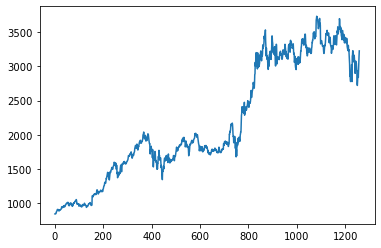

In [69]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [70]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [71]:
import numpy as np

In [72]:
df1

0        843.20
1        848.06
2        847.38
3        845.61
4        846.82
         ...   
1254    2837.06
1255    2947.33
1256    3062.08
1257    3144.78
1258    3225.01
Name: close, Length: 1259, dtype: float64

In [73]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [74]:
print(df1)

[[0.        ]
 [0.0016827 ]
 [0.00144726]
 ...
 [0.76825439]
 [0.79688804]
 [0.82466649]]


In [75]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [76]:
training_size,test_size

(818, 441)

In [77]:
train_data

array([[0.        ],
       [0.0016827 ],
       [0.00144726],
       [0.00083443],
       [0.00125337],
       [0.00443181],
       [0.01077484],
       [0.01147423],
       [0.01500583],
       [0.01672662],
       [0.02203095],
       [0.02287922],
       [0.01907064],
       [0.01789344],
       [0.02210366],
       [0.02048328],
       [0.01836085],
       [0.01435837],
       [0.02035517],
       [0.02097493],
       [0.01938917],
       [0.0203794 ],
       [0.01915719],
       [0.02223176],
       [0.02230447],
       [0.02288269],
       [0.02602996],
       [0.02831858],
       [0.03636508],
       [0.03591844],
       [0.03387219],
       [0.03266037],
       [0.03149009],
       [0.03664553],
       [0.0379543 ],
       [0.03661437],
       [0.03615388],
       [0.04090769],
       [0.03973742],
       [0.04254192],
       [0.03516365],
       [0.03991746],
       [0.04038488],
       [0.0441346 ],
       [0.04443583],
       [0.04748616],
       [0.0519976 ],
       [0.052

In [78]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [79]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [80]:
print(X_train.shape), print(y_train.shape)

(717, 100)
(717,)


(None, None)

In [81]:
print(X_test.shape), print(ytest.shape)

(340, 100)
(340,)


(None, None)

In [82]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [83]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [84]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [85]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [86]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=25,batch_size=64,verbose=1)

Epoch 1/25
12/12 [==============================] - 10s 354ms/step - loss: 0.0320 - val_loss: 0.0510
Epoch 2/25
12/12 [==============================] - 3s 244ms/step - loss: 0.0046 - val_loss: 0.0102
Epoch 3/25
12/12 [==============================] - 3s 275ms/step - loss: 0.0031 - val_loss: 0.0330
Epoch 4/25
12/12 [==============================] - 3s 243ms/step - loss: 0.0017 - val_loss: 0.0080
Epoch 5/25
12/12 [==============================] - 3s 262ms/step - loss: 0.0013 - val_loss: 0.0026
Epoch 6/25
12/12 [==============================] - 3s 253ms/step - loss: 0.0010 - val_loss: 0.0052
Epoch 7/25
12/12 [==============================] - 3s 256ms/step - loss: 9.8205e-04 - val_loss: 0.0035
Epoch 8/25
12/12 [==============================] - 3s 250ms/step - loss: 0.0010 - val_loss: 0.0033
Epoch 9/25
12/12 [==============================] - 3s 216ms/step - loss: 9.3961e-04 - val_loss: 0.0025
Epoch 10/25
12/12 [==============================] - 3s 215ms/step - loss: 9.6084e-04 - val

In [87]:
import tensorflow as tf

In [88]:
tf.__version__

'2.7.0'

In [89]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [90]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [91]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

1731.5774497889047

In [92]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

3294.078131827641

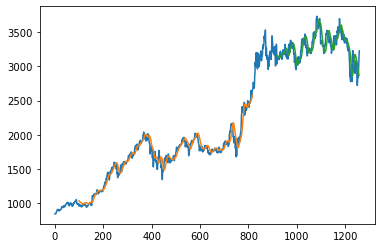

In [93]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [94]:
len(test_data)

441

In [95]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape


(1, 100)

In [96]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [97]:
temp_input

[0.8769687799709855,
 0.8826539621426419,
 0.9013783623766971,
 0.8757084838013856,
 0.8569009871165878,
 0.855045166383331,
 0.8797144251976137,
 0.9119142998604672,
 0.9264527163883511,
 0.9160621976933809,
 0.9462712198905203,
 0.9136627876781813,
 0.9103562414090387,
 0.9285855252907511,
 0.9356937341813787,
 0.9339694828284646,
 0.9368432350833216,
 0.9877605852760014,
 0.9810124610052593,
 0.9450039990166921,
 0.9475903760460631,
 0.9477184830742917,
 0.9214565422874375,
 0.9411954116909782,
 0.9223255926681233,
 0.9003915920241257,
 0.8981895360794403,
 0.881719127071785,
 0.8947306463172691,
 0.9279415277974938,
 0.9278965172200082,
 0.9141371299178385,
 0.9005716343340684,
 0.8822592540016134,
 0.8789630947888138,
 0.908209583098182,
 0.877436197506414,
 0.8853753709044703,
 0.8650271275288153,
 0.8881417902437843,
 0.8924351068654979,
 0.892653235048698,
 0.8829655738329276,
 0.8898314180755553,
 0.8797213499018424,
 0.8758677519986426,
 0.8625203845980729,
 0.888055231440927

In [98]:
# demonstrate prediction for next 10 days
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<180):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.7116756]
101
1 day input [0.88265396 0.90137836 0.87570848 0.85690099 0.85504517 0.87971443
 0.9119143  0.92645272 0.9160622  0.94627122 0.91366279 0.91035624
 0.92858553 0.93569373 0.93396948 0.93684324 0.98776059 0.98101246
 0.945004   0.94759038 0.94771848 0.92145654 0.94119541 0.92232559
 0.90039159 0.89818954 0.88171913 0.89473065 0.92794153 0.92789652
 0.91413713 0.90057163 0.88225925 0.87896309 0.90820958 0.8774362
 0.88537537 0.86502713 0.88814179 0.89243511 0.89265324 0.88296557
 0.88983142 0.87972135 0.87586775 0.86252038 0.88805523 0.86809477
 0.84617808 0.83854013 0.83369284 0.82629726 0.85313741 0.85206408
 0.82441374 0.83081216 0.80851115 0.79037882 0.75830705 0.69581505
 0.70897892 0.67741612 0.66970546 0.67500286 0.70505954 0.74380672
 0.75502474 0.75100149 0.66951849 0.79966138 0.80171109 0.82579522
 0.82424408 0.80910668 0.76956662 0.78254005 0.79184339 0.80285367
 0.77897729 0.76477472 0.74812773 0.71093861 0.75616385 0.77299435
 0.77143283 0.75466812 0.76097306 0

In [99]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [100]:
import matplotlib.pyplot as plt

In [101]:
len(df1)

1259

In [102]:
len(list(df1[1158:]))

101

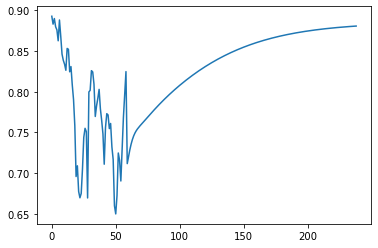

In [103]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [104]:
df3=scaler.inverse_transform(df3).tolist()

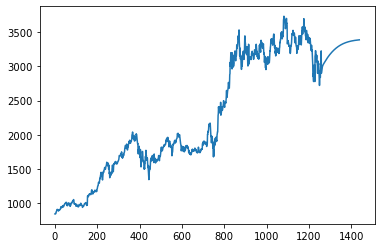

In [105]:
plt.plot(df3)